<a href="https://colab.research.google.com/github/PikuFuka/CSEL-302-compilation/blob/main/13_Sleep_Health_and_Lifestyle_Analysis_Sotomayor_Badillo_2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Project Overview**
**Sleep Health and Lifestyle Analysis**

**Project description:**


The purpose of this project is to analyze health and wellness data using advanced data visualization techniques. The goal is to uncover patterns and correlations that can contribute to better health and wellness strategies by examining factors such as sleep patterns, physical activity, stress levels, and vital health metrics.

**Dataset and Key Attributes**
The dataset contains information about individuals' sleep health and lifestyle attributes.

**Key attributes to be analyzed include:**

* Gender
* Age
* Occupation
* Sleep Duration
* Quality of Sleep
* Physical Activity Level
* Stress Level
* BMI Category
* Blood Pressure
* Heart Rate
* Daily Steps
* Sleep Disorder

# **2. Libraries and Data Handling**

**Data Manipulation**

**Pandas**

Description: Pandas is an open-source data analysis and manipulation library for Python. It provides data structures like Series (one-dimensional) and DataFrame (two-dimensional) that are easy to use for data cleaning, manipulation, and analysis.

**Data Visualization**

**Matplotlib**

Description: Matplotlib is a widely used plotting library for Python. It provides a flexible and comprehensive set of tools for creating static, animated, and interactive visualizations.

**Seaborn**

Description: Seaborn is a data visualization library built on top of Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. Seaborn works well with Pandas DataFrame objects and provides a more concise way to generate complex plots.

In [882]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

**Uploading CSV File**

In [883]:
df = pd.read_csv("13_Sleep Health and Lifestyle Analysis.csv")

**Handling the missing value(NaN) with None.**

In [884]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')

print("Missing values after filling:\n", df.isnull().sum())

Missing values after filling:
 Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64


**Data preprocessing**

In [885]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [886]:
df.tail()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
373,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [887]:
df.shape

(374, 13)

In [907]:
# Check the number of male and female individuals
gender_counts = df['BMI Category'].value_counts()
print("Number of males and females in the dataset:\n", gender_counts)


Number of males and females in the dataset:
 BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64


In [888]:
df.columns


Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [889]:
df.dtypes

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

#**3. Data Analysis Techniques**

In [890]:
df["Sleep Disorder"].unique()

array(['None', 'Sleep Apnea', 'Insomnia'], dtype=object)

In [891]:
df.nunique()

Person ID                  374
Gender                       2
Age                         31
Occupation                  11
Sleep Duration              27
Quality of Sleep             6
Physical Activity Level     16
Stress Level                 6
BMI Category                 4
Blood Pressure              25
Heart Rate                  19
Daily Steps                 20
Sleep Disorder               3
dtype: int64

**Statistics**

In [892]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


**We use Logistic Regression to predict the likelihood of future sleep disorders for individuals based on their current characteristics and behaviors.**

In [893]:
X = df[['Gender', 'Age', 'Sleep Duration', 'Quality of Sleep',
          'Physical Activity Level', 'Stress Level', 'BMI Category', 'Blood Pressure',
          'Heart Rate', 'Daily Steps']]
Y = df['Sleep Disorder']

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

    Insomnia       0.81      0.81      0.81        16
        None       0.95      0.98      0.97        43
 Sleep Apnea       0.87      0.81      0.84        16

    accuracy                           0.91        75
   macro avg       0.88      0.87      0.87        75
weighted avg       0.91      0.91      0.91        75

Confusion Matrix:
[[13  1  2]
 [ 1 42  0]
 [ 2  1 13]]


In [894]:
df["Sleep Disorder"].value_counts()

Sleep Disorder
None           219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

In [895]:
df.isnull()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,False,False,False,False,False,False,False,False,False,False,False,False,False
370,False,False,False,False,False,False,False,False,False,False,False,False,False
371,False,False,False,False,False,False,False,False,False,False,False,False,False
372,False,False,False,False,False,False,False,False,False,False,False,False,False


# **4. Visual Insights**

<Axes: >

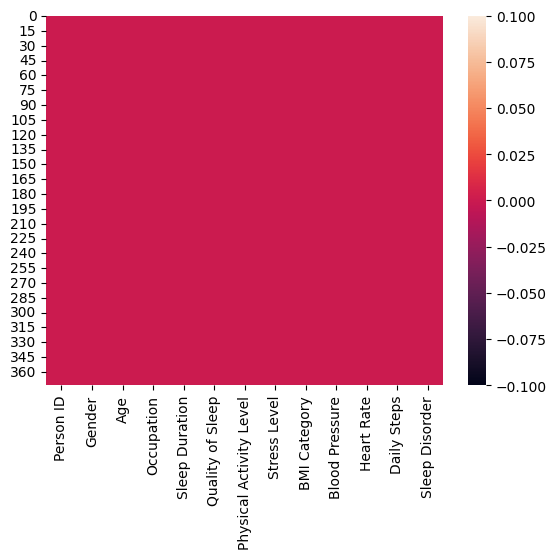

In [896]:
sns.heatmap(df.isnull())

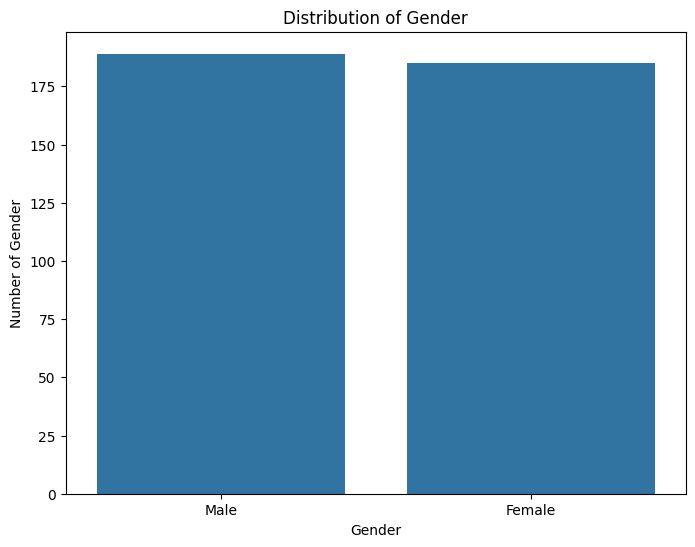

In [897]:
plt.figure(figsize=(8, 6))

sns.countplot(data=df, x= 'Gender')

plt.xlabel('Gender')

plt.ylabel('Number of Gender')

plt.title('Distribution of Gender')

plt.show()

**The distribution of a population based on different weight categories**: Normal, Overweight, Obese, and Normal Weight. The chart primarily shows that the majority of the population (52.1%) is of normal weight, a significant portion (39.6%) is overweight, and smaller percentages are either in the "Normal Weight" (5.6%) or obese (2.7%) categories.

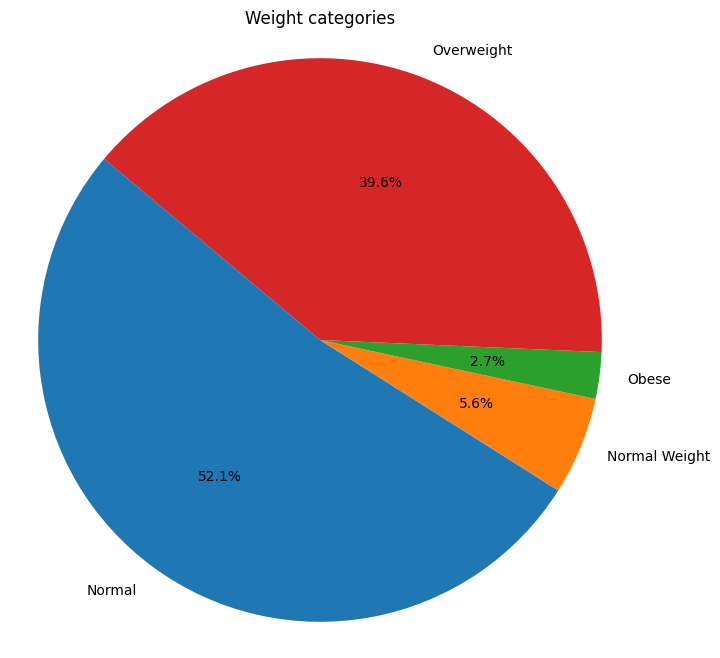

In [898]:
BMICategory = df.groupby('BMI Category').size()

plt.figure(figsize=(8, 8))

plt.pie(BMICategory, labels=BMICategory.index, autopct='%1.1f%%', startangle=140)
plt.title('Weight categories')

plt.axis('equal')

plt.show()

1. **Distribution of Age**
* **Age**: This axis represents the age of individuals in the dataset, ranging from 25 to 60 years.
* **Count**: This axis indicates the number of individuals within each age group.
* **Histogram Bars**: Each bar shows how many individuals fall into each age category.
*  **Line**: The blue line represents the density estimate, providing a smoothed version of the age distribution.
* **Observation**: The distribution is somewhat irregular with a notable peak at age 45, indicating a higher count of individuals in this age group. There are fewer individuals in the extreme age groups (25-30 and 55-60).
2. **Distribution of Sleep Duration**
* **Sleep Duration**: This axis shows the amount of sleep in hours, ranging from 6 to 8.5 hours.
* **Count**: This axis indicates the number of individuals who get a certain amount of sleep.
* **Histogram Bars**: Each bar represents the count of individuals for each sleep duration interval.
*  **Line**: The red line is the density estimate, smoothing out the sleep duration distribution.
* **Observation**: The distribution of sleep duration is fairly spread out with several peaks around 6.5, 7.5, and 8 hours, suggesting varied sleep patterns among individuals.
3. **Distribution of Heart Rate**
* **Heart Rate**: This axis shows heart rates, ranging from 60 to 85 beats per minute bpm.
* **Count**: This axis indicates the number of individuals with each heart rate.
* **Histogram Bars**: Each bar represents the number of individuals for each heart rate interval.
* **Line**: The green line represents the density estimate for heart rate.
* **Observation**: The distribution shows a strong peak around 65 to 75 bpm, indicating most individuals have a heart rate within this range, with fewer individuals having higher heart rates.

4. **Distribution of Daily Steps**

* **Daily Steps**: Represents the number of steps taken daily by individuals, ranging from 2000 to 10000 steps.
* **Count**: Shows the number of individuals within each step count range.
* **Histogram Bars**: Indicates how many individuals fall into each daily steps category.
* **Line**: The orange line represents the Kernel Density Estimate for daily steps, showing the smoothed probability density.
* **Observation**: The distribution has multiple peaks, with a significant peak around 5000 and another at 8000 steps, indicating common daily step counts among individuals.

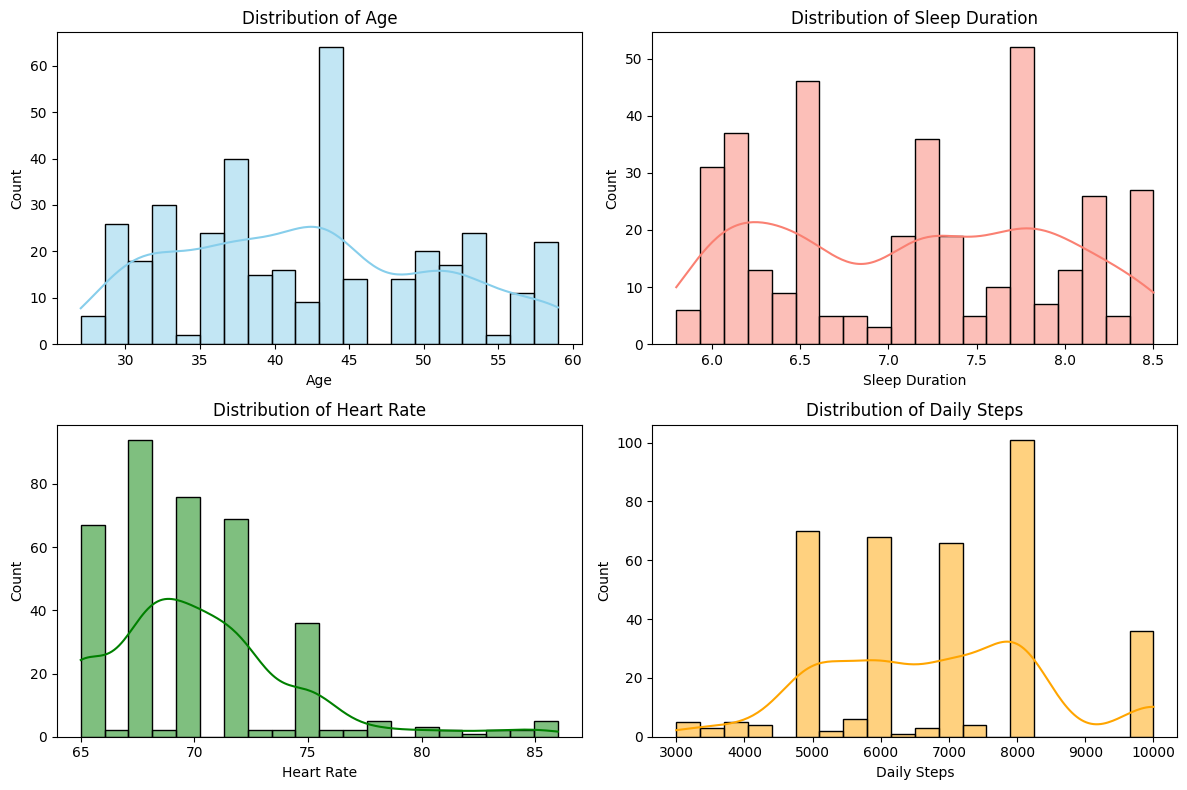

In [899]:
# Histograms for numerical features
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')

plt.subplot(2, 2, 2)
sns.histplot(df['Sleep Duration'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Sleep Duration')

plt.subplot(2, 2, 3)
sns.histplot(df['Heart Rate'], bins=20, kde=True, color='green')
plt.title('Distribution of Heart Rate')

plt.subplot(2, 2, 4)
sns.histplot(df['Daily Steps'], bins=20, kde=True, color='orange')
plt.title('Distribution of Daily Steps')

plt.tight_layout()
plt.show()

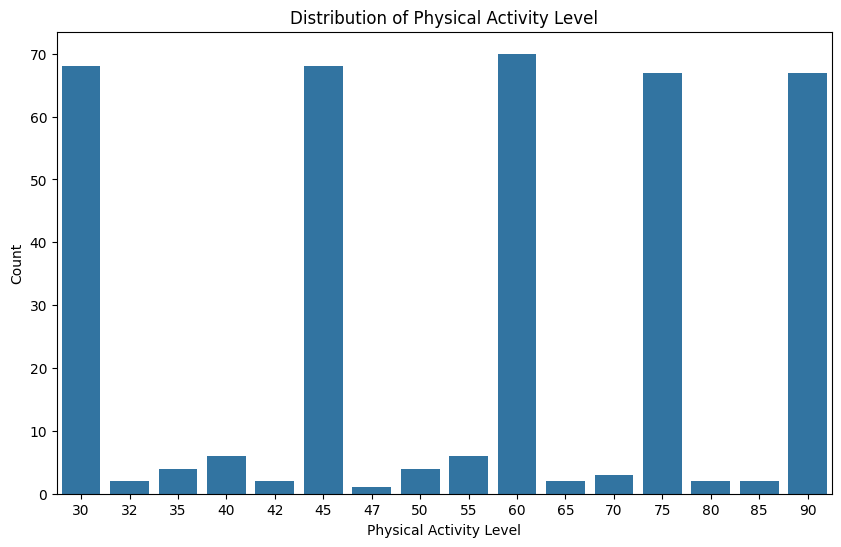

In [900]:
# Bar Charts for categorical features
plt.figure(figsize=(10, 6))
sns.countplot(x='Physical Activity Level', data=df)
plt.title('Distribution of Physical Activity Level')
plt.xlabel('Physical Activity Level')
plt.ylabel('Count')
plt.show()

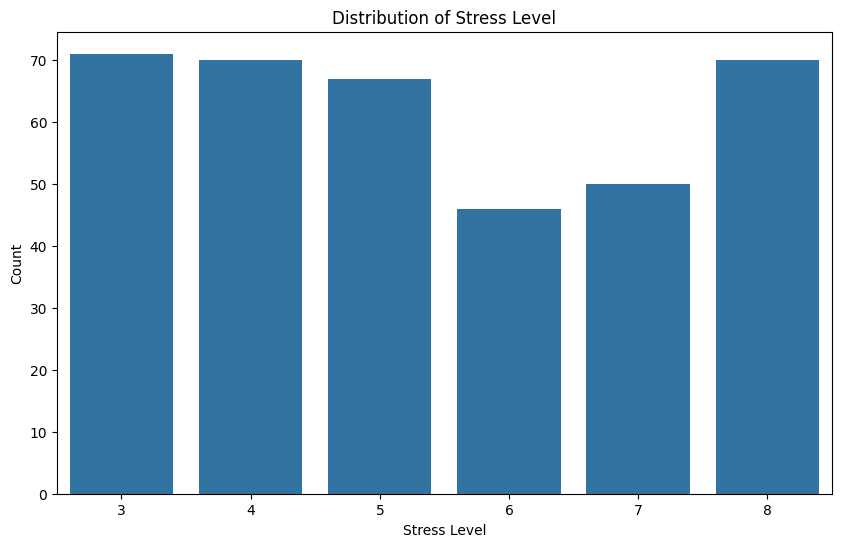

In [901]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Stress Level', data=df)
plt.title('Distribution of Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.show()

**The heatmap** highlights significant relationships between variables related to health and lifestyle. Notably, sleep quality and duration have strong negative correlations with stress levels, suggesting the importance of good sleep for stress management. Physical activity, measured by daily steps, also shows positive associations with health metrics, emphasizing the role of exercise in maintaining overall well-being.

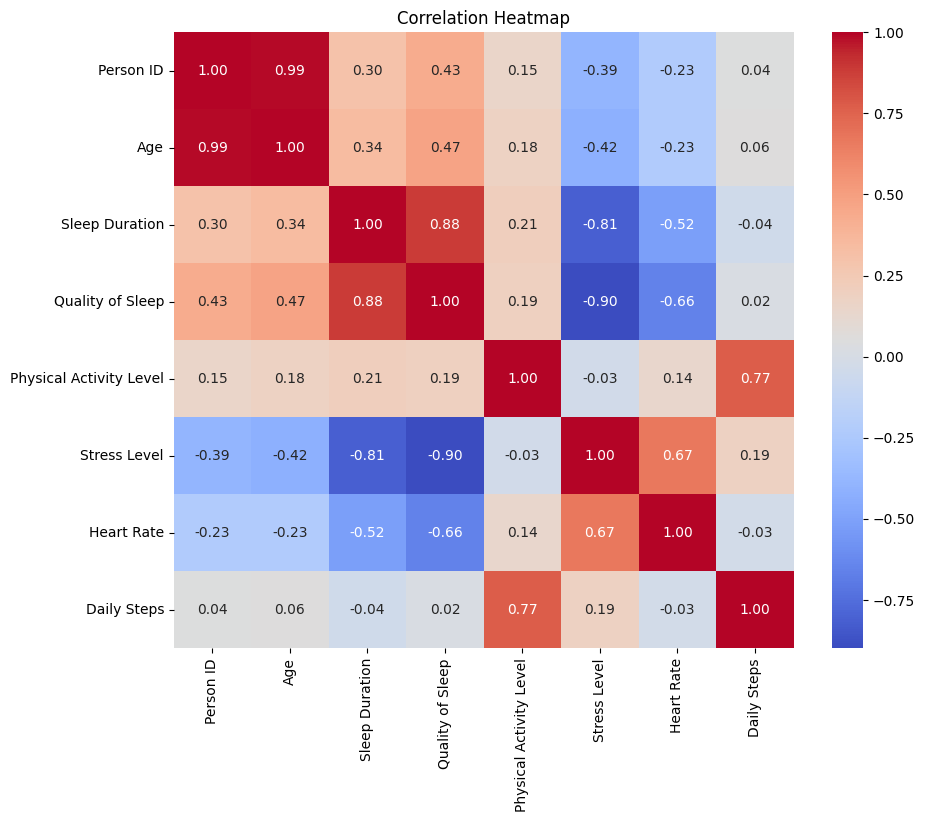

In [902]:
# Calculate the correlation matrix (excluding non-numeric columns)
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# **5. Key Findings and Business Impact**

**Summary**

The correlation heatmap reveals significant relationships between health-related variables, notably the strong negative correlations between sleep quality/duration and stress levels, and the strong positive correlations between physical activity/daily steps and overall health metrics. Better sleep is linked to lower stress and heart rates, while higher physical activity correlates with increased daily steps.

These **findings** can guide business decisions by highlighting the importance of comprehensive wellness programs that emphasize sleep quality, stress management, and physical activity. Companies can implement initiatives such as sleep workshops, stress reduction programs, and fitness challenges to improve employee health and productivity. Additionally, these insights can inform the development of health-focused products and services, such as wearable technology and health apps, which can further support individuals in optimizing their well-being. Promoting a culture of holistic wellness can lead to reduced healthcare costs, enhanced employee satisfaction, and increased retention.

# **6. Advanced Analysis**

# **7. Conclusion**

The analysis of the correlation heatmap has provided critical insights into the relationships between various health-related variables, emphasizing the impact of sleep quality, sleep duration, and physical activity on stress levels and overall health. The strong negative correlations between sleep metrics and stress levels highlight the significant role that adequate and high-quality sleep plays in stress reduction. Similarly, the positive correlations between physical activity and daily steps underline the importance of maintaining an active lifestyle for better health outcomes.

These insights can have a profound impact on business strategies and organizational practices. By leveraging these findings, companies can design and implement wellness programs that focus on improving sleep quality, managing stress, and promoting physical activity. For instance, initiatives such as sleep education workshops, stress management training, flexible work hours, and fitness challenges can contribute to enhancing employee health and well-being. This, in turn, can lead to increased productivity, reduced absenteeism, lower healthcare costs, and higher employee satisfaction and retention.

It facilitates greater control. With data-driven decision making you gain greater control over the direction of your business and the quality of your decisions. This is because it is based on objective data, concrete evidence and results can be effectively measured in order to assess impact.